Загрузка и подготовка данных из CSV


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Загрузка данных из CSV
df = pd.read_csv("Students Social Media Addiction.csv")

# Быстрый осмотр
print(df.head())
print(df.info())

# Преобразуем категориальные переменные в числовые с помощью LabelEncoder
label_encoders = {}
categorical_cols = ["Gender", "Academic_Level", "Country", "Most_Used_Platform", "Relationship_Status", "Affects_Academic_Performance"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Целевая переменная: Addicted_Score (например, можно классифицировать как 'high' или 'low')
# Для простоты создадим бинарную цель: Addicted_Score >= 6 - "Addicted", иначе "Not Addicted"
df["Addicted_Label"] = (df["Addicted_Score"] >= 6).astype(int)

# Выделяем признаки и целевую переменную
X = df.drop(columns=["Student_ID", "Addicted_Score", "Addicted_Label"])
y = df["Addicted_Label"]

# Делим на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Class distribution in train:\n{y_train.value_counts(normalize=True)}")


   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

Обучение модели RidgeClassifier

In [3]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

In [4]:
from sklearn import metrics
from sklearn.utils.extmath import density
from time import time

def benchmark(clf, X_train, y_train, X_test, y_test, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3f}s")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3f}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3f}")

    if hasattr(clf, "coef_"):
        if len(clf.coef_.shape) == 2:
            n_features = clf.coef_.shape[1]
        else:
            n_features = clf.coef_.shape[0]
        print(f"dimensionality: {n_features}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    clf_descr = str(custom_name) if custom_name else clf.__class__.__name__
    return clf_descr, score, train_time, test_time


In [6]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB

classifiers = [
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Classifier"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    (SGDClassifier(loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True), "log-loss SGD"),
    (NearestCentroid(), "NearestCentroid"),
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
]

results = []
for clf, name in classifiers:
    print("=" * 80)
    results.append(benchmark(clf, X_train, y_train, X_test, y_test, name))


________________________________________________________________________________
Training: 
LogisticRegression(C=5, max_iter=1000)
train time: 0.052s
test time:  0.001s
accuracy:   0.965
dimensionality: 11
density: 1.0


________________________________________________________________________________
Training: 
RidgeClassifier(solver='sparse_cg')
train time: 0.001s
test time:  0.000s
accuracy:   0.965
dimensionality: 11
density: 1.0


________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=100)
train time: 0.001s
test time:  0.004s
accuracy:   0.716

________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 0.060s
test time:  0.003s
accuracy:   0.979

________________________________________________________________________________
Training: 
LinearSVC(C=0.1, dual=False)
train time: 0.001s
test time:  0.000s
accuracy:   0.965
dimensionality: 11
dens

Визуализация результатов

________________________________________________________________________________
Training: 
LogisticRegression(max_iter=1000)
train time: 0.043s
test time:  0.001s
accuracy:   0.965
dimensionality: 11
density: 1.0

________________________________________________________________________________
Training: 
RidgeClassifier(solver='sparse_cg')
train time: 0.001s
test time:  0.000s
accuracy:   0.965
dimensionality: 11
density: 1.0

________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
train time: 0.001s
test time:  0.003s
accuracy:   0.908

________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 0.061s
test time:  0.003s
accuracy:   0.979

________________________________________________________________________________
Training: 
LinearSVC()
train time: 0.001s
test time:  0.000s
accuracy:   0.965
dimensionality: 11
density: 1.0

_______________

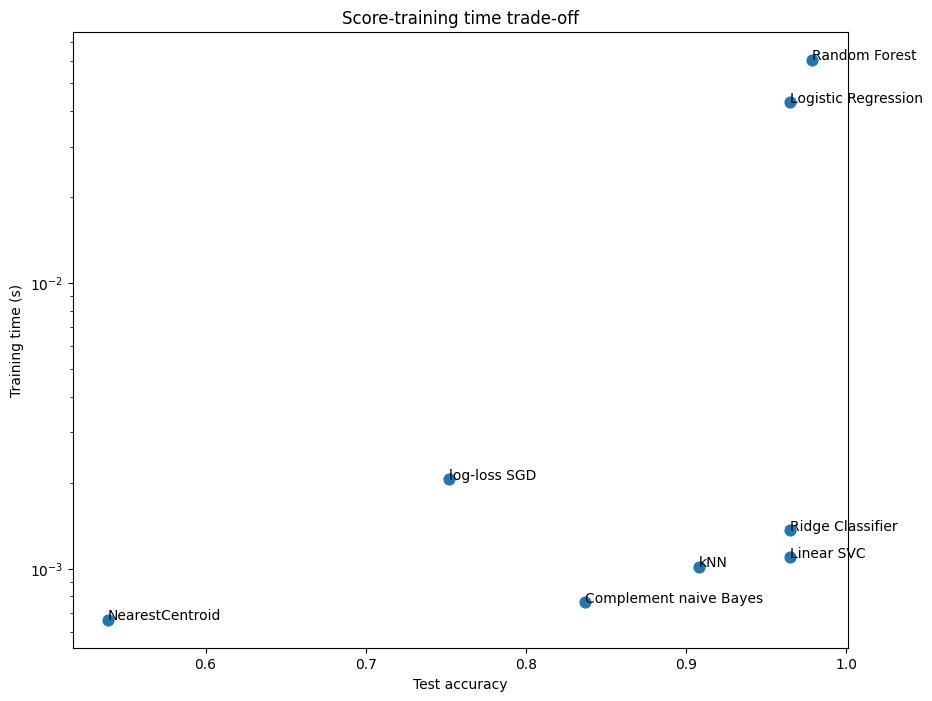

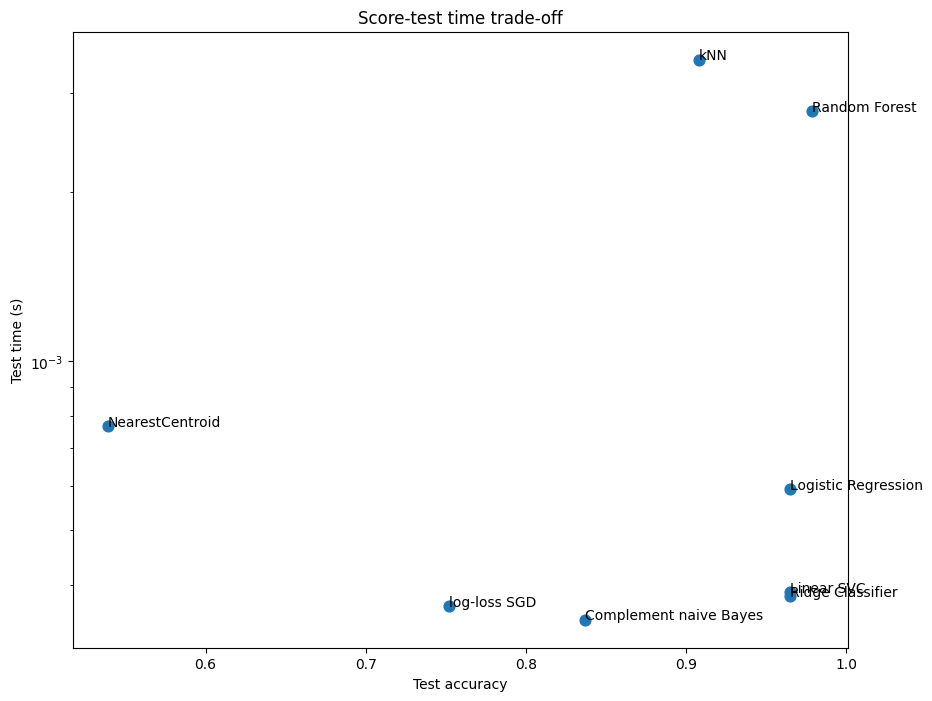

In [8]:
from sklearn import metrics
from sklearn.utils.extmath import density
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC
from time import time
import numpy as np
import matplotlib.pyplot as plt

def benchmark(clf, X_train, y_train, X_test, y_test, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3f}s")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3f}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3f}")

    if hasattr(clf, "coef_"):
        coef_shape = clf.coef_.shape
        if len(coef_shape) == 1:
            print(f"dimensionality: {coef_shape[0]}")
        else:
            print(f"dimensionality: {coef_shape[1]}")
        print(f"density: {density(clf.coef_)}")

    print()
    clf_descr = str(custom_name) if custom_name else clf.__class__.__name__
    return clf_descr, score, train_time, test_time


results = []
classifiers = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Classifier"),
    (KNeighborsClassifier(n_neighbors=10), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    (LinearSVC(max_iter=1000), "Linear SVC"),
    (SGDClassifier(loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True), "log-loss SGD"),
    (NearestCentroid(), "NearestCentroid"),
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
]

for clf, name in classifiers:
    print("=" * 80)
    results.append(benchmark(clf, X_train, y_train, X_test, y_test, name))

# Визуализация результатов
results_arr = np.array(results)
clf_names, scores, train_times, test_times = results_arr.T

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(scores.astype(float), train_times.astype(float), s=60)
ax1.set(title="Score-training time trade-off", yscale="log", xlabel="Test accuracy", ylabel="Training time (s)")

fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(scores.astype(float), test_times.astype(float), s=60)
ax2.set(title="Score-test time trade-off", yscale="log", xlabel="Test accuracy", ylabel="Test time (s)")

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (float(scores[i]), float(train_times[i])))
    ax2.annotate(txt, (float(scores[i]), float(test_times[i])))
